# Pymaceuticals Inc.
---

### Analysis
- Capomulin and Ramicane were the most successful at reducing the volume of the tumors within the mice subjects. Within these regimens: Infubinol, Capomulin, Ceftamin and Ramicane-- Infubinol was the least effective at reducing the size of the tumors. 
- Capomulin and Ramicane had the most amount of mice test subjects within the experiement, while Propriva had the least amount.
- The correlation between mouse weight and the average tumor volume is 0.84, which is a strong positive correlation. An increase in mouse weight increases the tumor volume. 

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# Checking the number of mice.
number_of_mice=len(combined_data["Mouse ID"].unique())
number_of_mice

249

In [82]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_data.loc[combined_data.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [83]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data=combined_data.loc[combined_data["Mouse ID"]=='g989', :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_data.loc[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [85]:
# Checking the number of mice in the clean DataFrame.
clean_number=len(clean_df["Mouse ID"].unique())
clean_number

248

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).mean()
median=clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).median()
variance=clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).var()
standard_deviation=clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).std()
sem=clean_df["Tumor Volume (mm3)"].groupby(clean_df['Drug Regimen']).sem()


summary_statistics=pd.DataFrame({"Mean Tumor Volume": mean, 
                                "Median Tumor Volume": median,
                                "Tumor Volume Variance": variance,
                                "Tumor Volume Std. Dev.": standard_deviation,
                                 "Tumor Volume Std. Err.": sem})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

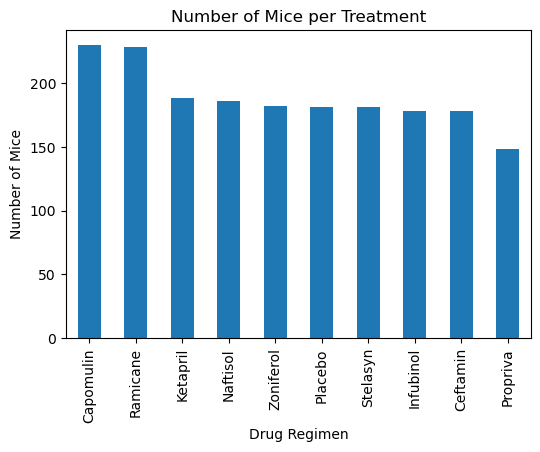

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
all_mice= clean_df["Drug Regimen"].value_counts()

pandas_bar = all_mice.plot(kind="bar", figsize=(6,4))
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()

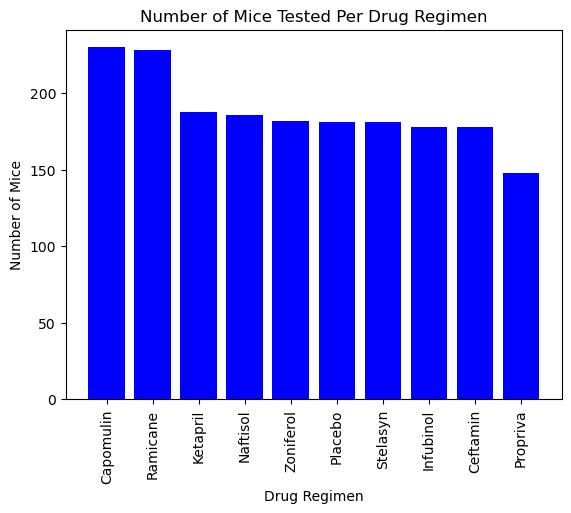

In [89]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=all_mice.index.values
y_axis=all_mice.values

plt.bar(x_axis, y_axis, color='b', align='center')

plt.title("Number of Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()


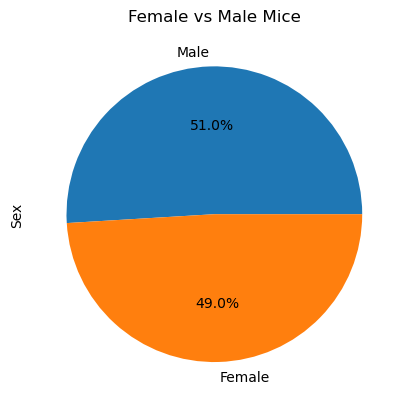

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexes_data=clean_df["Sex"].value_counts()
plt.title("Female vs Male Mice")
sexes_data.plot.pie(autopct="%1.1f%%")
plt.show()


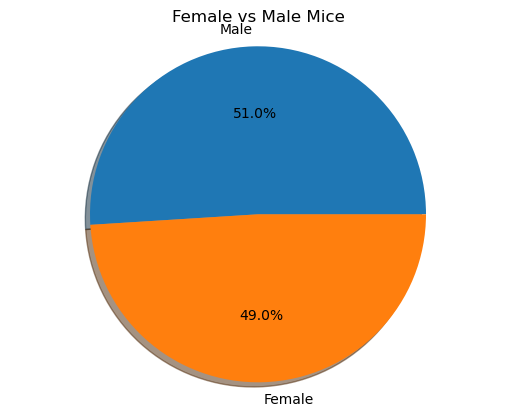

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexes = [ "Male", "Female"]
amount = [51, 49]


plt.title("Female vs Male Mice")
plt.pie(amount, labels=sexes,
        autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin", :]
Ramicane_df=combined_data.loc[combined_data["Drug Regimen"]=="Ramicane", :]
Infubinol_df=combined_data.loc[combined_data["Drug Regimen"]=="Infubinol", :]
Ceftamin_df=combined_data.loc[combined_data["Drug Regimen"]=="Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [93]:
#Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")


In [94]:
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")


In [95]:
#Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")

In [96]:
#Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")


In [112]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

Capomulin_quartiles =Capomulin_tumors.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

print(f"Capomulin's potential outliers could be values below {Capomulin_lowerq} and above {Capomulin_upperq}")

#Ramicane
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

Ramicane_quartiles =Ramicane_tumors.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq
print(f"Ramicane's potential outliers could be values below {Ramicane_lowerq} and above {Ramicane_upperq}")

#Infubinol
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

Infubinol_quartiles =Infubinol_tumors.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

print(f"Infubinol's potential outliers could be values below {Infubinol_lowerq} and above {Infubinol_upperq}")

#Ceftamin
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

Ceftamin_quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq
print(f"Ceftamin's potential outliers could be values below {Ceftamin_lowerq} and above {Ceftamin_upperq}")

Capomulin's potential outliers could be values below 32.37735684 and above 40.1592203
Ramicane's potential outliers could be values below 31.56046955 and above 40.65900627
Infubinol's potential outliers could be values below 54.04860769 and above 65.52574285
Ceftamin's potential outliers could be values below 48.72207785 and above 64.29983003


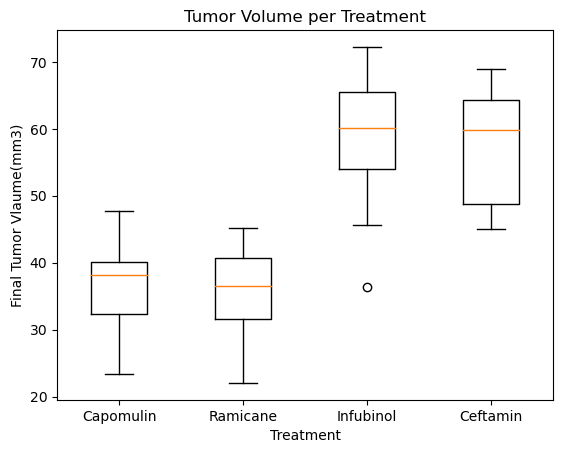

In [114]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data=[Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Treatment')
ax1.set_xlabel('Treatment')
ax1.set_ylabel('Final Tumor Vlaume(mm3)')
ax1.boxplot(tumor_data, labels=treatment_list)
plt.show()

## Line and Scatter Plots

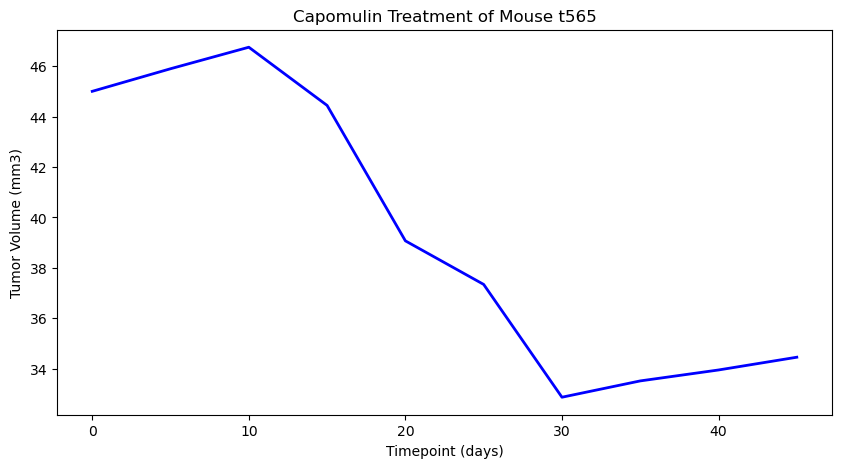

In [125]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse=Capomulin_df.loc[Capomulin_df["Mouse ID"] == "t565",:]
capomulin_mouse.head()

x_axis=capomulin_mouse["Timepoint"]
y_axis=capomulin_mouse["Tumor Volume (mm3)"]

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
fig1, ax1 = plt.subplots(figsize=(10, 5))
line_plot = plt.plot(x_axis, y_axis, linewidth=2, markersize=15,color="blue")
plt.title("Capomulin Treatment of Mouse t565")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


# Show the chart
plt.show()

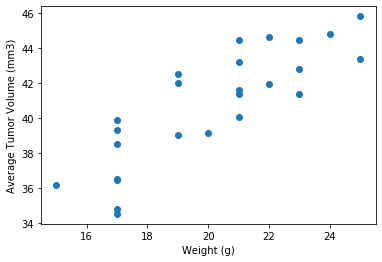

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin=Capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter


/var/folders/87/d2f31j0x0_l7gm9cwy_dq0hr0000gn/T/ipykernel_6363/2645021704.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average=Capomulin_df.groupby(["Mouse ID"]).mean()


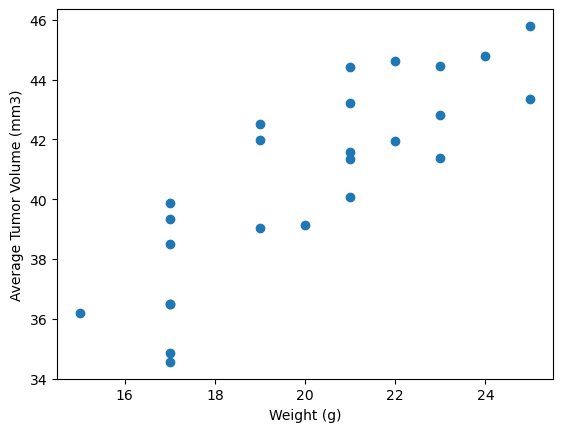

In [127]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_average=Capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


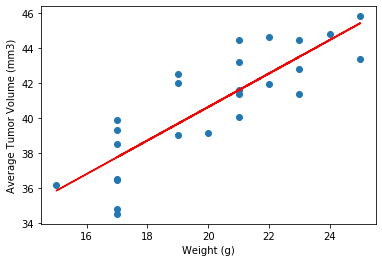

In [18]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

In [137]:
#figure out slope and intercept
results=st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
results

LinregressResult(slope=0.9544396890241047, intercept=21.55216053268501, rvalue=0.841936342469472, pvalue=1.3225722434712478e-07, stderr=0.12754359033201326, intercept_stderr=2.590987686768347)

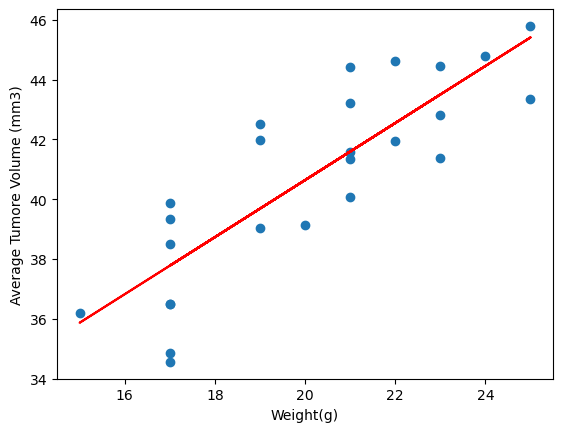

In [139]:
#Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope = 0.9544396890241047
intercept = 21.55216053268501

y_values = capomulin_average['Weight (g)']*slope+intercept
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()